# 1.. What is Feather & how to read data from data !
    Feather is a binary file format that is used for storing data ..
    Feather is a fast, lightweight, and easy-to-use binary file format for storing data 
    It shows high I/O speed, doesn’t take too much memory on the disk and doesn’t need any unpacking 
    when loaded back into RAM.
    
    Feather has max I/O speed

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
### In order to work with feather files , do install pyarrow package ..
## !pip install pyarrow

In [4]:
!pip install pyarrow

In [5]:
all_data=pd.read_feather("Sales_data.ftr")

In [6]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
all_data.shape

(186850, 6)

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [9]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
all_data.duplicated().sum()

1162

In [11]:
all_data.drop_duplicates(inplace=True)

In [12]:
### since there 545 observations where entire row have missing value , u can drop these 545 rows..

all_data = all_data.dropna(how="all")

In [13]:
all_data.shape

(185687, 6)

In [14]:
all_data.duplicated().sum()

0

In [15]:
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

# 2.. Which is the best month for sale ?

Lets first understand what this term 'best' is all about : if any month has maximum sales, we will consider that as best

In [16]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


### adding month columns

In [17]:
all_data["Order Date"][0]

'04/19/19 08:46'

In [18]:
all_data["Order Date"][0].split("/")

['04', '19', '19 08:46']

In [19]:
all_data["Order Date"][0].split("/")[0]

'04'

In [20]:
def return_month(x):
    return x.split("/")[0]

In [21]:
all_data["month"]=all_data["Order Date"].apply(return_month)

In [22]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [23]:
all_data["month"].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [24]:
all_data.dtypes#everything is object we have to convert month quantity and price to integer

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [25]:
#but in month we can see "order date" which we have to drop

In [26]:
all_data["month"].value_counts()
#we can see order date is just one so we have to drop it

12            24944
10            20249
04            18257
11            17544
05            16552
03            15128
07            14275
06            13535
02            11957
08            11943
09            11603
01             9699
Order Date        1
Name: month, dtype: int64

In [27]:
filter1=all_data["month"]=="Order Date"

In [28]:
all_data[~filter1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [29]:
all_data=all_data[~filter1]

In [30]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [31]:
all_data["month"]=all_data["month"].astype("int64")

In [32]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int64
dtype: object

In [33]:
all_data["Quantity Ordered"]=all_data["Quantity Ordered"].astype("int64")
all_data["Price Each"]=all_data["Price Each"].astype("float")

In [34]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int64
dtype: object

In [35]:
all_data["sales"]=all_data["Quantity Ordered"]*all_data["Price Each"]

In [36]:
all_data.head()#a new column sales have been added

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [37]:
all_data.groupby("month")["sales"].sum()

month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

<Axes: xlabel='month'>

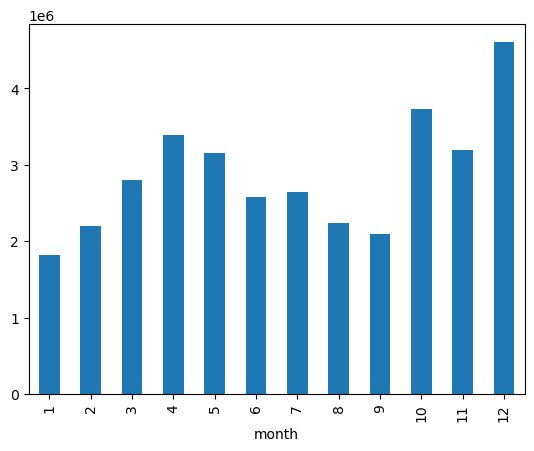

In [38]:
all_data.groupby("month")["sales"].sum().plot(kind="bar")

- we can see 12 th month got the biggest sale followed by 10 and 4
- the biggest in december will be because of the year end sale festival sale etc

# 3.. Which city has max order ?

In [39]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [42]:
all_data1=all_data.copy()

In [44]:
all_data["Purchase Address"][0].split(",")[1]

' Dallas'

In [45]:
def city_name(x):
    return x.split(",")[1]

In [46]:
all_data["city"]=all_data["Purchase Address"].apply(city_name)

In [47]:
all_data["city"].nunique()#there are 9 unique cities from where the orders have been placed

9

In [48]:
all_data["city"].value_counts()

 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: city, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Dallas'),
  Text(1, 0, ' Boston'),
  Text(2, 0, ' Los Angeles'),
  Text(3, 0, ' San Francisco'),
  Text(4, 0, ' Seattle'),
  Text(5, 0, ' Atlanta'),
  Text(6, 0, ' New York City'),
  Text(7, 0, ' Portland'),
  Text(8, 0, ' Austin')])

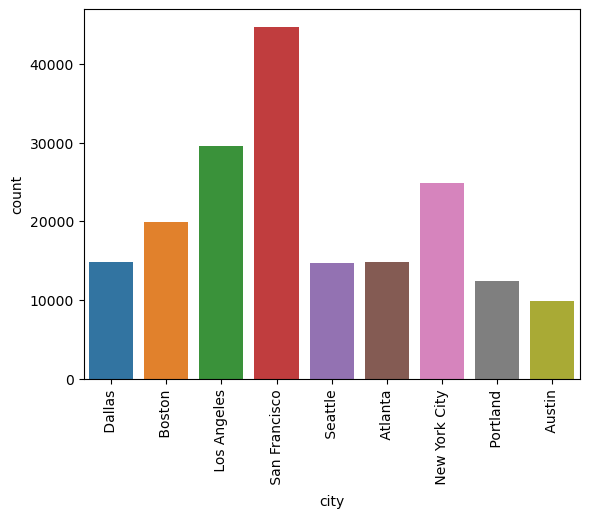

In [50]:
sns.countplot(data=all_data,x="city")
plt.xticks(rotation=90)

<Axes: ylabel='city'>

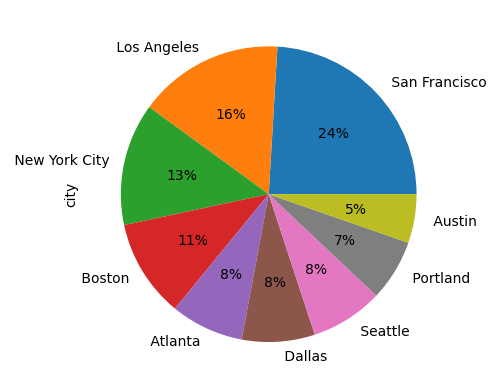

In [51]:
pd.value_counts(all_data['city']).plot(kind='pie' , autopct = '%1.0f%%') ## Pandas pie chart..

- sanfrancisco is city with most number of orders followed by los angeles and then newyork city

# 4.. What product sold the most & Why?

In [52]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month', 'sales', 'city'],
      dtype='object')

In [54]:
count_df=all_data.groupby(["Product"]).agg({"Quantity Ordered":"sum","Price Each":"mean"})

In [55]:
count_df

,Quantity Ordered,Price Each
Product,,
20in Monitor,4126,109.99
27in 4K Gaming Monitor,6239,389.99
27in FHD Monitor,7541,149.99
34in Ultrawide Monitor,6192,379.99
AA Batteries (4-pack),27615,3.84
AAA Batteries (4-pack),30986,2.99
Apple Airpods Headphones,15637,150.00
Bose SoundSport Headphones,13430,99.99
Flatscreen TV,4813,300.00


In [58]:
count_df = count_df.reset_index()

In [59]:
count_df

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


In [60]:
'''

When we say twin axes, it means a figure can have dual x or y-axes..
plt.twinx() : function which is used to create a twin Axes that are sharing the x-axis..

Similarly, the function twiny() is used to create a second x axis in your figure, which means twiny() sharing the y-axis..


    

'''

'\n\nWhen we say twin axes, it means a figure can have dual x or y-axes..\nplt.twinx() : function which is used to create a twin Axes that are sharing the x-axis..\n\nSimilarly, the function twiny() is used to create a second x axis in your figure, which means twiny() sharing the y-axis..\n\n\n    \n\n'

In [61]:
products = count_df['Product'].values

Text(0, 0.5, 'Avg price of product')

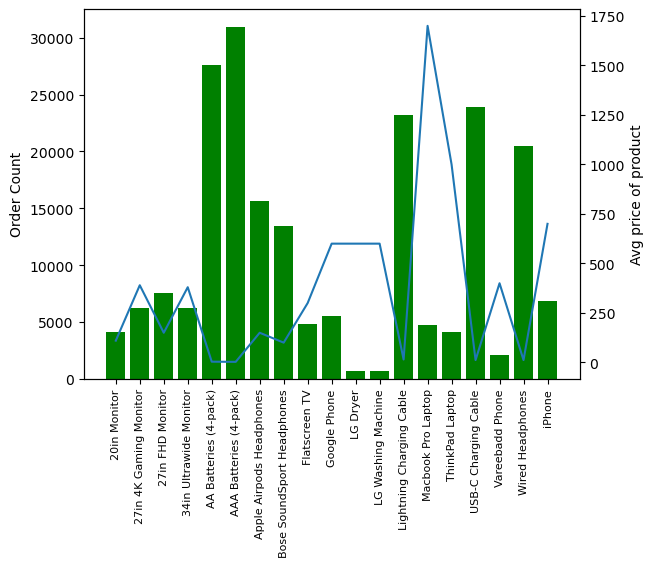

In [62]:
fig , ax1 = plt.subplots()

ax2 = ax1.twinx() ## as X-axis is same for both plots , ie we are sharing x-axis , ie we have to use ax2 = ax1.twinx()

ax1.bar(count_df['Product'] , count_df['Quantity Ordered'] , color='g')
ax2.plot(count_df['Product'] , count_df['Price Each'] )
ax1.set_xticklabels(products , rotation='vertical' , fontsize=8 )

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price of product')

# Insights : 

- The top selling product is 'AAA Batteries'. 
- The top selling products seems to have a correlation with the price of the product. 
- The cheaper the product higher the quantity ordered and vice versa.




# 5.. Understanding Trend of the most sold product ?

In [67]:
all_data["Product"].value_counts().head()#top 5 sold products

USB-C Charging Cable        21859
Lightning Charging Cable    21610
AAA Batteries (4-pack)      20612
AA Batteries (4-pack)       20558
Wired Headphones            18849
Name: Product, dtype: int64

In [68]:
most_sold_product = all_data['Product'].value_counts()[0:5].index

In [69]:
most_sold_product

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object')

In [70]:
all_data['Product'].isin(most_sold_product)

0          True
2         False
3         False
4          True
5          True
          ...  
186845     True
186846    False
186847    False
186848    False
186849     True
Name: Product, Length: 185686, dtype: bool

In [75]:
most_sold_product_df = all_data[all_data['Product'].isin(most_sold_product)]  ## data of Top 5 most sold products only ..

In [76]:
most_sold_product_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...
186840,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001",9,2.99,Dallas
186842,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,11.95,San Francisco
186844,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016",9,11.95,San Francisco
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles


In [80]:
most_sold_product_df.groupby(["month","Product"]).size()

month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [83]:
pivot=most_sold_product_df.groupby(['month' , 'Product']).size().unstack()

<Axes: xlabel='month'>

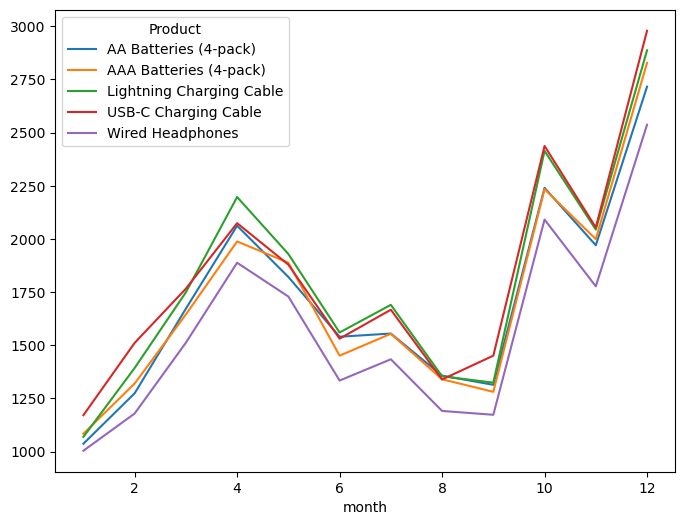

In [85]:
pivot.plot(figsize=(8,6))

# Inference :
Products have been sold more in Oct , Nov , Dec 

# 6.. What products are most often sold together ?

keep orders that have same order Id, are sold mostly together ..
    Approach : ie keep duplicated data 

In [86]:
all_data.columns 

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month', 'sales', 'city'],
      dtype='object')

In [87]:
all_data['Order ID'] 

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185686, dtype: object

In [88]:
df_duplicated = all_data[all_data['Order ID'].duplicated(keep=False)]

In [89]:
df_duplicated ## dataframe in which we have those Order Ids who have purchased more products !

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [92]:
all_data["Order ID"].nunique()

178437

In [96]:
dup_products = df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x : ','.join(x)).reset_index().rename(columns={'Product':'grouped_products'})

## for every Order-Id , collect all the products ..

In [97]:
dup_products

,Order ID,grouped_products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [98]:
dup_products_df = df_duplicated.merge(dup_products , how='left' , on='Order ID') ## merge dataframes 

In [99]:
dup_products_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,grouped_products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,"Google Phone,USB-C Charging Cable"


In [100]:
no_dup_df = dup_products_df.drop_duplicates(subset=['Order ID']) # lets drop out all duplicate Order ID

In [101]:
no_dup_df.shape

(6879, 10)

<Axes: ylabel='grouped_products'>

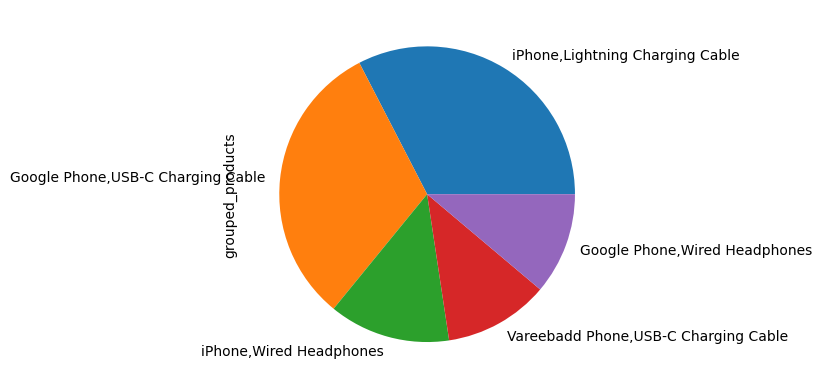

In [102]:
no_dup_df['grouped_products'].value_counts()[0:5].plot.pie()

# inference
- we can see iphone and lighting charging cable are brought together and some use wired head fones also so we can give suggestions to buy wired head fones and charging cable along with iphone

- people buying google fone tend to buy usb-c charging cable and wired headfones which can also be added in reccommendations